# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 12 X-ray diffraction II

We haven't learned some basic theories regarding how to calculate the PXRD in the last classes. 
Now we are going to assemble all the codes which we have to complete the entire project.


## 12.1 Interplanar spacing

How many differents spacing we can have in a crystal? If we represent the crystal as a periodic packing of atoms in the three dimensional space. According to the [_Miller indices_](https://en.wikipedia.org/wiki/Miller_index), 
we can calculate any arbitray $d_{hkl}$ from 1/$g_{hkl}$ based on the reciprocal lattice

$$g_{hkl} = h \cdot b1 + k \cdot b2 + c \cdot b3 $$

where $b1, b2, b3$ are the reciprocal lattice vectors, which satisfy the following conditions:
$$ b1 = \frac{a2 \times a3} {V}$$
$$ b2 = \frac{a3 \times a1} {V}$$
$$ b3 = \frac{a1 \times a2} {V}$$

in which $V$ is the volume of the real space lattice.

Suppose the box is a cube described by
$$
\begin{bmatrix}
    a & 0 & 0 \\
    0 & a & 0 \\
    0 & 0 & a
\end{bmatrix}
$$

It is much easier for the case of cubic lattice, in which b1=b2=b3=1/a. 
Therefore, the interplanar spacing $d$ is

$$ d_{hkl} = \frac{a}{\sqrt{h^2+k^2+l^2}} $$

Remember that the truncation of (hkl) planes is

$$ d_\text{min} = \frac{\lambda}{2}$$

according to the Bragg's law.

In [50]:
# Write a program to calculate all possible (hkl) planes and the corresponding d spacing for the following condition
# 1, wavelength is 1.5487 Å 
# 2, lattice is a cube with a unit length of 3.5 Å.
from math import sqrt

def all_dhkl(a, wavelength):
    """ 3x3 representation -> 1x6 (a, b, c, alpha, beta, gamma)"""
    d_min = wavelength/2
    d_hkl = []
    hkl_list = []
    h1 = int(a/d_min)

    for h in range(-h1,h1+1):
        for k in range(-h1,h1+1):
            for l in range(-h1,h1+1):
                sum_d = sqrt(h**2+k**2+l**2)
                if sum_d > 0 and a/sum_d > d_min:
                    d_hkl.append(a/sum_d)
                    hkl_list.append([h,k,l])
    d_hkl = np.array(d_hkl)
    hkl_list = np.array(hkl_list)
    seq = np.argsort(1/d_hkl)
    #print(d_hkl[seq])
    return np.array(hkl_list)[seq,:]

hkl_list = all_dhkl(5.692, 1.54184)
print(hkl_list)

[[ 0  0 -1]
 [ 1  0  0]
 [-1  0  0]
 ..., 
 [ 2 -5  5]
 [ 2 -1  7]
 [ 7  2  1]]


## 12.2 Internsity

The scattering intensity of the incident X-rays is more complicated, which is determined by the atomic scattering factor and the structure factor.

### 12.2.1 Atomic scattering factor 

The atomic scattering factor ($f$) is a measure of the scattering amplitude of a wave by an isolated atom.
Naively, we can think that the more electrons an atom has, the stronger factor it is (why?).
Furthermore, the factor is also angle dependent. It is impossible to derive the analytic formula for this relation.
Instead, a possible solution is to measure the data experimentally and then fit it into some particular form.

The way which we are using is a 9-parameter equation by Don Cromer and J. Mann (http://www.ruppweb.org/Xray/comp/scatfac.htm):

$$f(\frac{\sin\theta}{\lambda}) = \sum_{i=1}^4 a_i e^{-b_i(\frac{\sin(\theta)}{\lambda})^2} + c $$

where $a_i, b_i, c$ (i =1,2,3,4) are Cromer-Mann coefficients.

The source of data is also available on line:
https://physics.nist.gov/PhysRefData/FFast/html/form.html


For simplicity, let's just consider the compound of NaCl. The parameters are the followings:


|Element| a1 | a2 | a3 | a4 | b1 | b2 | b3 | b4 | c |
|-------|----|----|----|----|----|----|----|----|---|
|Na |4.763 |3.174 | 1.267|1.113|3.285|8.842|0.314|129.424|0.676|
|Cl |11.460|7.196 |6.256 |1.645|0.010|1.166|18.519|47.778|-9.557|


### 12.2.2 Structure factor

Structure factor is a mathematical descriptor of a material scatters incident radiation, 
by looping over all atoms in the crystal unit cell.,

$$ F = \sum_{j=1}^n f_j e^{[2\pi \dot i(hx_j + ky_j + lz_j)]}$$

where 

- {f_j} is the atomic scattering factor of the $j$-th atom, 
- $h, k, l$ are Miller indices
- $x_j, y_j, z_j$ are the coordinates of the $j$-th atom in space. 

Note for each $\theta$ or $d$, there would be a corresponding $F$ value, and the $F$ could be a complex number.

Ideally, the intensity would be just the powder of $F$

$$ I = |F|^2 $$

### 12.2.3 Corrections

However, we will still need to do a couple of corrections to obtain the intensity in real life.
It is obvious that the direction of polarisation of an X-ray photon can change as a result of scattering/diffraction. In fact there are two extreme cases to consider; when the change is maximal or when there is no change, depending on whether the initial polarisation is or is not in the plane containing the pre- and post-scattered X-rays:
- 1: Polarization in plane of scattering, $P=\cos^2 2\theta$
- 2: Polarization perpendicular to plane of scattering, $P=1$
- 3: the average: $P=(1+\cos^2 2\theta)/2$

Moreover, the incoming X-rays are not strictly parallel, which induced a so called _Lorentz-polarization factor_ which depends on the different experimental setup.

- 1: Laues Diffraction:  $1/\sin^2 \theta$
- 2: Powder Diffraction: $1/(2\sin^2 \theta \cos\theta$)

In our case, let's just use the following corrections:

$$ I = |F|^2 \frac{1+\cos^2 2\theta}{4\sin^2 \theta \cos\theta} $$




In [51]:
# Write a program to calculate all possible (100) planes for the following condition
# 1, wavelength is 1.5487 Å 
# 2, lattice is a cube with a unit length of 3.5 Å.
# 3，coordinates are 
#    Na1(0,0,0), Na2(0,1/2,1/2), Na3(1/2,1/2,0), Na4(1/2,0,1/2)
#    Cl1(0,1/,0), Cl2(0,0,1/2), Cl3(1/2,0,0), Cl4(1/2,1/2,1/2)

import numpy as np
from math import asin, sin, cos, exp, pi
def intensity(wavelength, cubic, position, hkl):
    """" Calculate intensity """
    h,k,l = hkl
    d = cubic/sqrt(h**2+k**2+l**2)
    sintheta = wavelength/2/d
    theta = asin(sintheta)
    #print(sintheta, wavelength, sintheta/wavelength, 1/2/d)
    f = atom_scatter(sintheta/wavelength)
    F = structure_factor(f, position, hkl)
    LP = 1/sin(theta)**2/cos(theta)
    P = 1 + cos(2*theta)**2
    I = (np.abs(F))**2*LP*P
    return I

def atom_scatter(d0):
    """ scattering factor """
    f = []
    atom_type = [0,0,0,0,1,1,1,1]
    s = [[4.763, 3.174, 1.267, 1.113, 3.285, 8.842, 0.314, 129.424, 0.676],
         [11.46, 7.196, 6.256, 1.645, 0.01, 1.166, 18.519, 47.778, -9.557]]
    count = 0
    for i in atom_type:
        c = s[i]
        f_tmp = c[0]*np.exp(-c[4]*d0) + c[1]*np.exp(-c[5]*d0) + c[2]*np.exp(-c[6]*d0) + c[3]*np.exp(-c[7]*d0) + c[8]
        f.append(f_tmp)
    #print(f)
    return f
   
def structure_factor(f, pos, hkl):
    """ N*1 array"""
    F = 0
    h,k,l=hkl
    for fj, xyz in zip(f, pos):
        x,y,z = xyz
        #F += fj*(-1)**(2*(h*x + k*y+ l*z))
        F += fj*np.exp(2*pi*(1j)*(h*x + k*y+ l*z))
                    
    return F



In [61]:
pos =  [[0,0,0],
        [0.5,0.5,0],
        [0,0.5,0.5],
        [0.5,0,0.5],
        [0.5,0.5,0.5],
        [0.5,0,0],
        [0,0,0.5],
        [0,0.5,0]]

hkl = [2,2,0]
print(hkl, intensity(1.54184, 5.692, pos, hkl)) # set h+k+l = even number
hkl = [2,1,3]
print(hkl, intensity(1.54184, 5.692, pos, hkl)) # set h+k+l = odd number


[2, 2, 0] 23933.5299323
[2, 1, 3] 1.35062089968e-29


In [57]:
# We can now output the intensities for all hkls
def xrd_by_hkls(wavelength, cubic, pos, hkl_list):
    for hkl in hkl_list:
        h,k,l = hkl
        i = intensity(wavelength, cubic, pos, hkl)
        if i > 1:
            print("[%2d %2d %2d] %6.2f" %(h,k,l,i))
            
xrd_by_hkls(1.54184, 5.692, pos, hkl_list)

[ 1 -1 -1] 3868.66
[ 1  1 -1] 3868.66
[-1 -1 -1] 3868.66
[ 1 -1  1] 3868.66
[ 1  1  1] 3868.66
[-1  1 -1] 3868.66
[-1  1  1] 3868.66
[-1 -1  1] 3868.66
[ 0  2  0] 68297.73
[ 0  0 -2] 68297.73
[-2  0  0] 68297.73
[ 0 -2  0] 68297.73
[ 0  0  2] 68297.73
[ 2  0  0] 68297.73
[-2  2  0] 23933.53
[ 2  2  0] 23933.53
[-2  0  2] 23933.53
[-2 -2  0] 23933.53
[-2  0 -2] 23933.53
[ 0 -2 -2] 23933.53
[ 2 -2  0] 23933.53
[ 2  0 -2] 23933.53
[ 0  2  2] 23933.53
[ 2  0  2] 23933.53
[ 0 -2  2] 23933.53
[ 0  2 -2] 23933.53
[-3  1 -1] 1170.29
[-1 -1  3] 1170.29
[-3  1  1] 1170.29
[ 3 -1  1] 1170.29
[-1 -3 -1] 1170.29
[-3 -1  1] 1170.29
[-1  1  3] 1170.29
[-3 -1 -1] 1170.29
[ 1 -3  1] 1170.29
[ 3  1  1] 1170.29
[ 1  1  3] 1170.29
[ 3 -1 -1] 1170.29
[-1 -3  1] 1170.29
[ 1 -3 -1] 1170.29
[-1  1 -3] 1170.29
[ 3  1 -1] 1170.29
[ 1  1 -3] 1170.29
[ 1 -1 -3] 1170.29
[ 1  3  1] 1170.29
[-1  3 -1] 1170.29
[ 1 -1  3] 1170.29
[-1 -1 -3] 1170.29
[ 1  3 -1] 1170.29
[-1  3  1] 1170.29
[-2 -2  2] 12452.05
[-2  2 -2] 1

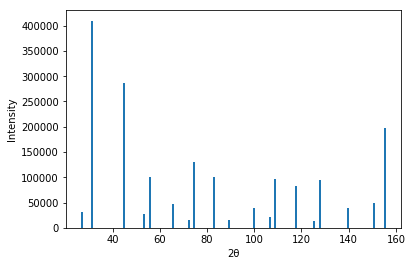

27.134628700330037 30949.3171819
31.43308997068069 409786.358653
45.04918485643573 287202.359188
53.384871543033654 28086.8779157
55.96154010436182 99616.4074451
65.60663124402394 46500.438957
72.36594753728141 15338.3401067
74.55883104451698 130333.145975
83.13683716012694 100627.504129
89.4593571122345 14762.9810203
100.02058274720915 38859.1035053
106.50294501991175 21054.4125757
108.70842016343906 96099.8494062
117.87229574297378 81811.2688555
125.27946735209758 13078.4901391
127.8976383841211 93975.860045
139.55269289999802 39938.2556157
150.5827062704211 49778.3816575
155.1966785838556 196943.030417


In [81]:
import matplotlib.pyplot as plt
from math import degrees

def plot_pxrd(wavelength, cubic, pos, hkl_list):
    theta2 = []
    pxrd_intensity = []
    for hkl in hkl_list:
        h,k,l = hkl
        i = intensity(wavelength, cubic, pos, hkl)
        if i > 1:
            d = cubic/sqrt(h**2+k**2+l**2)
            sintheta = wavelength/2/d
            theta = degrees(asin(sintheta))
            if len(pxrd_intensity) == 0:
                pxrd_intensity.append(i)
                theta2.append(2*theta)
            elif abs(theta*2-theta2[-1])<0.001:
                pxrd_intensity[-1] += i
            else:
                pxrd_intensity.append(i)
                theta2.append(2*theta)
                
    plt.bar(theta2, pxrd_intensity)
    plt.xlabel('2θ')
    plt.ylabel('Intensity')
    plt.show()

    for theta, i in zip(theta2, pxrd_intensity):
        print(theta, i)
    
plot_pxrd(1.54184, 5.692, pos, hkl_list)

## 12.3 Further Reading


### Code
The above code indeed could calculate XRD very well. However, it is gonna be insufficient when you have many hkl planes to calculate.

Therefore, it could be further improved in two aspects
- __verctorization__, one could try to kill those unnecessary for loops by following the recipes which we mentioned in the previous classes
- __class design__, since there are many variables to deal with, it is better to assemble them into several classes

I created a [github page](https://github.com/qzhu2017/XRD) while preparing for the lecture notes
